# Used Car Price Prediction Model

## Phase 2 - Data Science and Machine Learning

### Name: Rahul Kulkarni
### Roll No: 21150

# Importing Libraries

In [904]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [905]:
crude_data = pd.read_csv("training_data.csv")

# Function to extract the brand name from the 'Brand' column
def extract_brand_name(s):
    return s.split()[0] if isinstance(s, str) else s

# Apply the function to create a new column 'Brand_Name'
crude_data['Brand_Name'] = crude_data['Brand'].apply(extract_brand_name)

# Replace the 'Brand' column with the 'Brand_Name' column
crude_data['Brand'] = crude_data['Brand_Name']

# Drop the 'Brand_Name' column
crude_data = crude_data.drop('Brand_Name', axis=1)
crude_data.head()

# Save the modified data to a new CSV file or overwrite the existing one
crude_data.to_csv("modified_data.csv", index=False)


df1 = pd.read_csv("modified_data.csv")
df1.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0
1,Audi,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0
2,Toyota,Pune,2012,111000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.1 bhp,5.0
3,Maruti,Pune,2012,90400,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0
4,Maruti,Jaipur,2016,68630,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0


In [906]:
df2= pd.read_csv("training_data_targets.csv",header=None, names=["Price"])
df2.head()

,Price
0,3.20
1,21.50
2,4.75
3,2.90
4,3.87


In [907]:
df1.shape

(5417, 11)

In [908]:
df2.shape

(5417, 1)

In [909]:
df_main=pd.concat([df1, df2], axis=1)
df_main.head()
df_main.shape

(5417, 12)

### Distribution of Cars with Price

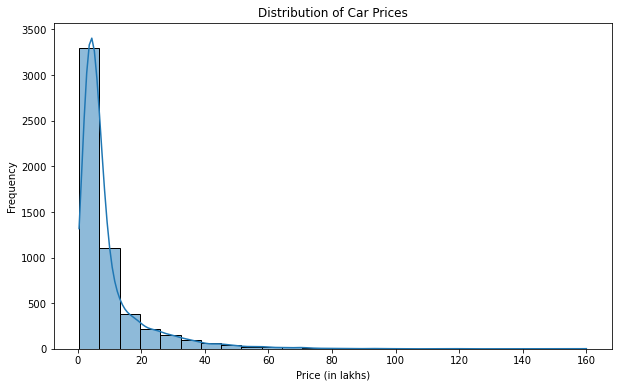

In [910]:
plt.figure(figsize=(10, 6))
sns.histplot(df_main["Price"], bins=25, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (in lakhs)")
plt.ylabel("Frequency")
plt.show()


### Missing value Check

In [911]:
df_main.isnull().sum()

Brand                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               34
Power                34
Seats                38
Price                 0
dtype: int64

#### Dropping all missing value rows using dropna to see if any effect on Performance

In [912]:
#df_main.isnull().sum()
#df_main=df_main.dropna()

### Check missing values again (in %)

In [913]:
100*(df_main.isnull().sum()/len(df_main))

Brand                0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.018460
Engine               0.627654
Power                0.627654
Seats                0.701495
Price                0.000000
dtype: float64

#### Dropping Categorical columns (to see if there are any changes in R2 score)

In [914]:
print(df_main['Fuel_Type'].unique())
print(df_main['Transmission'].unique())
print(df_main['Owner_Type'].unique())
print(df_main['Seats'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Automatic' 'Manual']
['Second' 'First' 'Third' 'Fourth & Above']
[ 5.  8.  7.  4. nan  6.  2. 10.  9.  0.]


In [915]:
#df_main=df_main.drop(columns=['Brand','Location', 'Engine','Seats'], axis=1)
print("Dropping These Columns lead to decrease in R2 Score")

Dropping These Columns lead to decrease in R2 Score


## String Data to Numeric - Extraction

In [916]:
def extract_numerical_from_string(s):
    try:
        return float(s.split()[0])
    except:
        return None

# Clean the 'Mileage', 'Engine', and 'Power' columns
df_main['Mileage'] = df_main['Mileage'].apply(extract_numerical_from_string)
df_main['Power'] = df_main['Power'].apply(extract_numerical_from_string)
df_main['Engine'] = df_main['Engine'].apply(extract_numerical_from_string)

In [917]:
#q = car_2['Engine'].quantile(0.99)
#car_3 = car_2[car_2['Engine']<q]
#sns.displot(car_3['Engine'], kde = True, bins = 20)
#plt.title('')

## Cleaned Data Set

In [918]:
df_main.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Delhi,2014,35214,Petrol,Automatic,Second,23.10,998.0,67.04,5.0,3.20
1,Audi,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0,21.50
2,Toyota,Pune,2012,111000,Diesel,Manual,First,23.59,1364.0,67.10,5.0,4.75
3,Maruti,Pune,2012,90400,CNG,Manual,First,26.20,998.0,58.20,5.0,2.90
4,Maruti,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998.0,67.00,5.0,3.87


# Removing Outliers

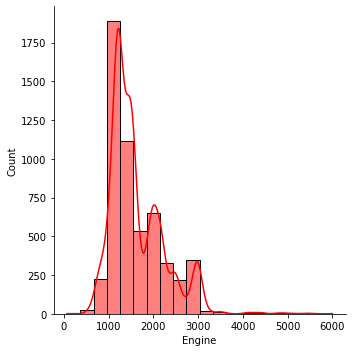

In [919]:
sns.displot(df_main['Engine'], kde = True, bins = 20, color = 'red')

Text(0.5, 1.0, '')

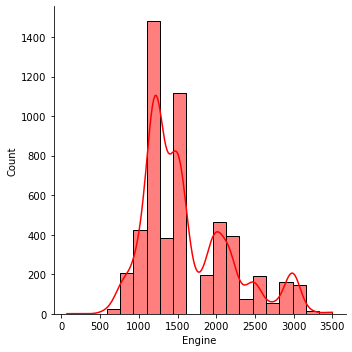

In [920]:
qu = df_main['Engine'].quantile(0.995)
df_main = df_main[df_main['Engine']<qu]

sns.displot(df_main['Engine'], kde = True, bins = 20, color = 'red')
plt.title('')




In [921]:
ql = df_main['Engine'].quantile(0.0001)
df_main = df_main[df_main['Engine']>ql]

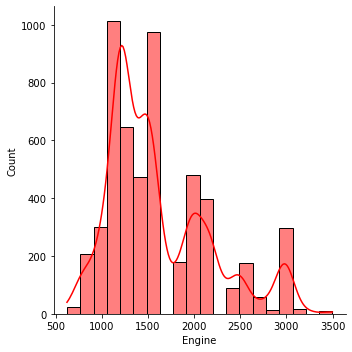

In [922]:
sns.displot(df_main['Engine'], kde = True, bins = 20, color = 'red')

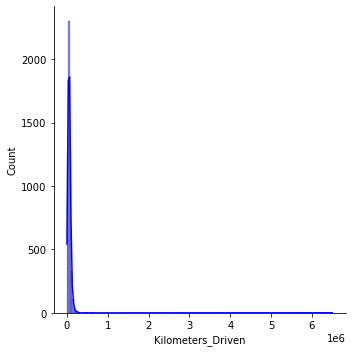

In [923]:
sns.displot(df_main['Kilometers_Driven'], kde = True, bins = 200, color = 'blue')

Text(0.5, 1.0, '')

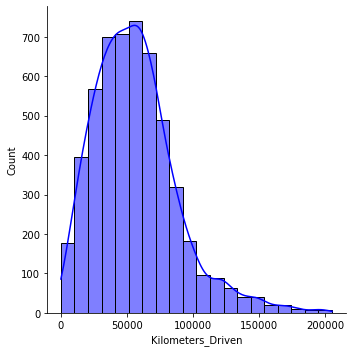

In [924]:
qu = df_main['Kilometers_Driven'].quantile(0.995)
df_main = df_main[df_main['Kilometers_Driven']<qu]

sns.displot(df_main['Kilometers_Driven'], kde = True, bins = 20, color = 'blue')
plt.title('')


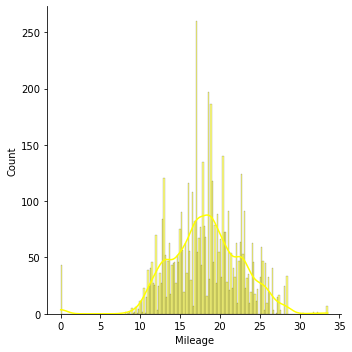

In [925]:
sns.displot(df_main['Mileage'], kde = True, bins = 200, color = 'yellow')

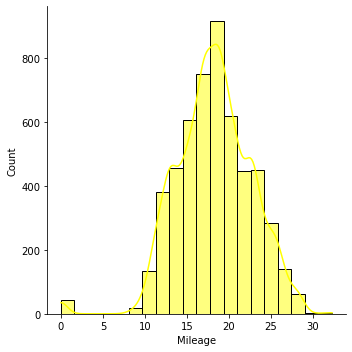

In [926]:
qu = df_main['Mileage'].quantile(0.999)
df_main = df_main[df_main['Mileage']< qu]

sns.displot(df_main['Mileage'], kde = True, bins = 20, color = 'yellow')

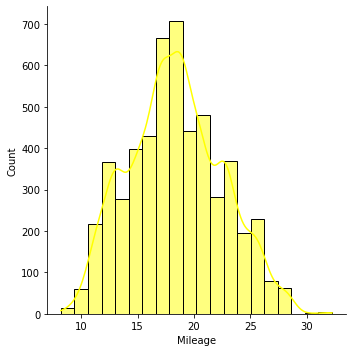

In [927]:
ql = df_main['Mileage'].quantile(0.001)
df_main = df_main[df_main['Mileage'] > ql]

sns.displot(df_main['Mileage'], kde = True, bins = 20, color = 'yellow')

## Colinearity check

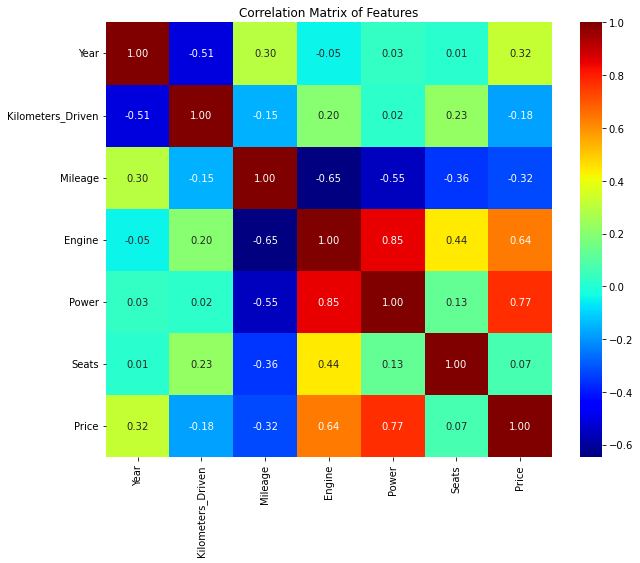

In [928]:
df_main.corr()

# Visualizing the correlation matrix
correlation_matrix = df_main.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="jet", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Importing Model Libraries

In [929]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


In [930]:
X=df_main.drop(['Price'],axis=1)
X.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014,35214,Petrol,Automatic,Second,23.10,998.0,67.04,5.0
1,Audi,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0
2,Toyota,Pune,2012,111000,Diesel,Manual,First,23.59,1364.0,67.10,5.0
3,Maruti,Pune,2012,90400,CNG,Manual,First,26.20,998.0,58.20,5.0
4,Maruti,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998.0,67.00,5.0


In [931]:
y=df_main['Price']
y.head()

0     3.20
1    21.50
2     4.75
3     2.90
4     3.87
Name: Price, dtype: float64

### Label Encoding categorical variables

In [932]:
#label_encoder = LabelEncoder()
#for column in ['Brand','Location','Fuel_Type', 'Transmission', 'Owner_Type']:
#    X[column] = label_encoder.fit_transform(X[column])

###  Handle missing values using SimpleImputer

In [933]:
#imputer = SimpleImputer(strategy='mean')
#X = imputer.fit_transform(X)

## Spliting Dataset

In [934]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [935]:
X_train.shape, X_test.shape

((4222, 11), (1056, 11))

## Defining numerical and categorical features

In [936]:
numeric_features = [ 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
categorical_features = ['Year','Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

## OneHot Encoding, Imputation and Scaling

In [977]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


#  Random Forest Regressor Model

In [978]:
# Preprocessor to apply transformations based on feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline with the preprocessor and the Random Forest Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [979]:
'''
        elif self.rgr_opt=='rf':
            print('\n\t ### Random Forest ### \n')
            rgr = RandomForestRegressor(max_features=None)
            rgr_parameters = {
            'rgr__criterion':('squared_error','friedman_mse','poisson'),       
            'rgr__n_estimators':(30,50,100),
            'rgr__max_depth':(10,20,30),
            'rgr__max_features':('auto', 'sqrt', 'log2'),
            }          
            
            
'''

"\n        elif self.rgr_opt=='rf':\n            print('\n\t ### Random Forest ### \n')\n            rgr = RandomForestRegressor(max_features=None)\n            rgr_parameters = {\n            'rgr__criterion':('squared_error','friedman_mse','poisson'),       \n            'rgr__n_estimators':(30,50,100),\n            'rgr__max_depth':(10,20,30),\n            'rgr__max_features':('auto', 'sqrt', 'log2'),\n            }          \n            \n            \n"

### Cross Validation and Model Fitting - Random Forest

In [980]:
# Cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean CV R2 Score: {cv_scores.mean()}")

# Fitting the model
pipeline.fit(X_train, y_train)

# Making predictions on the test set
y_pred = pipeline.predict(X_test)

Cross-validation R2 scores: [0.85854349 0.85297515 0.86021005 0.89572437 0.82247615]
Mean CV R2 Score: 0.8579858409588912


### Performance - R2 Score - Random Forest

In [981]:
r2 = r2_score(y_test, y_pred)
print(f"Validation R2 Score: {r2}")

Validation R2 Score: 0.8755849611974516


### Hyper Parameter Tuning - Random Forest

In [982]:

param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(pipeline, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)

# Fit the model on the training data with hyperparameter tuning
grid_search_rf.fit(X_train, y_train)

# best parameters 
print("Best Parameters for RandomForest:", grid_search_rf.best_params_)
print("Best R2 Score for RandomForest:", grid_search_rf.best_score_)

#RandomForest best model
best_rf_model = grid_search_rf.best_estimator_

# Evaluation
y_pred_best_rf = best_rf_model.predict(X_test)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Validation R2 Score for the Best RandomForest Regressor: {r2_best_rf}")


Best Parameters for RandomForest: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best R2 Score for RandomForest: 0.842685063878568
Validation R2 Score for the Best RandomForest Regressor: 0.8765400858506838


### Predicted Values vs Actual Values Plot - Random Forest


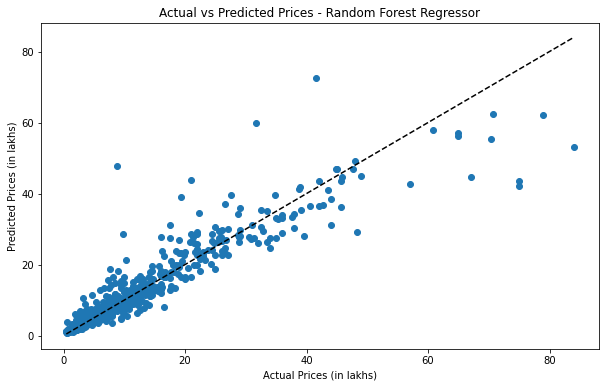

In [983]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')
plt.title("Actual vs Predicted Prices - Random Forest Regressor")
plt.xlabel("Actual Prices (in lakhs)")
plt.ylabel("Predicted Prices (in lakhs)")
plt.show()

# Linear Regression Model

In [984]:
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

### Cross Validation - Linear regression

In [985]:
linear_cv_scores = cross_val_score(linear_pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores for Linear Regression: {linear_cv_scores}")
print(f"Mean CV R2 Score for Linear Regression: {linear_cv_scores.mean()}")

Cross-validation R2 scores for Linear Regression: [0.79042739 0.79764295 0.79734673 0.8064318  0.73694317]
Mean CV R2 Score for Linear Regression: 0.7857584069120506


### Fitting and Performance - Linear regression

In [986]:
# Fitting the Linear Regression model
linear_pipeline.fit(X_train, y_train)

# Making predictions on the test set using Linear Regression
linear_y_pred = linear_pipeline.predict(X_test)
linear_r2 = r2_score(y_test, linear_y_pred)
print(f"Validation R2 Score for Linear Regression: {linear_r2}")

Validation R2 Score for Linear Regression: 0.7984548892576279


### Predicted Values vs Actual Values Plot - Linear Regression

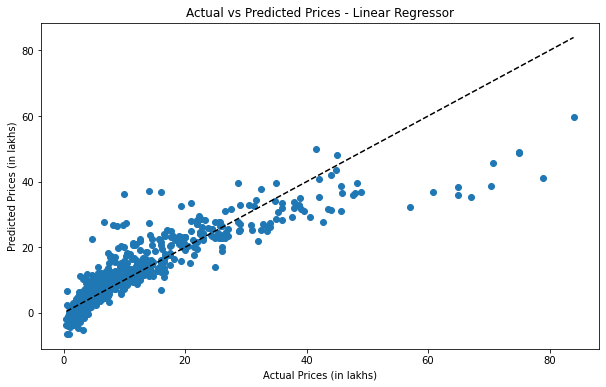

In [987]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')
plt.title("Actual vs Predicted Prices - Linear Regressor")
plt.xlabel("Actual Prices (in lakhs)")
plt.ylabel("Predicted Prices (in lakhs)")
plt.show()

# AdaBoost Regressor Model

In [988]:
adaboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(n_estimators=20, random_state=42))
])

### Cross Validation - Adaboost regressor

In [989]:
adaboost_cv_scores = cross_val_score(adaboost_pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores for AdaBoost Regressor: {adaboost_cv_scores}")
print(f"Mean CV R2 Score for AdaBoost Regressor: {adaboost_cv_scores.mean()}")

Cross-validation R2 scores for AdaBoost Regressor: [0.73832036 0.70322997 0.74880991 0.71067576 0.6974138 ]
Mean CV R2 Score for AdaBoost Regressor: 0.7196899602004574


In [990]:
# Fitting the AdaBoost Regressor model
adaboost_pipeline.fit(X_train, y_train)

adaboost_y_pred = adaboost_pipeline.predict(X_test)
adaboost_r2 = r2_score(y_test, adaboost_y_pred)
print(f"Validation R2 Score for AdaBoost Regressor: {adaboost_r2}")

Validation R2 Score for AdaBoost Regressor: 0.7228981707773915


### Hyper Parameter Tuning

In [991]:
param_grid_adaboost = {
    'regressor__n_estimators': [10, 20, 30],
    'regressor__learning_rate': [0.3, 0.4, 0.5]
}

grid_search_adaboost = GridSearchCV(adaboost_pipeline, param_grid_adaboost, cv=5, scoring='r2', n_jobs=-1)

# Fitting the model on the training data with hyperparameter tuning
grid_search_adaboost.fit(X_train, y_train)


#best parameters using hyper tuning
print("Best Parameters for AdaBoost:", grid_search_adaboost.best_params_)
print("Best R2 Score for AdaBoost:", grid_search_adaboost.best_score_)

#best model
best_adaboost_model = grid_search_adaboost.best_estimator_

#Evaluation
y_pred_best_adaboost = best_adaboost_model.predict(X_test)
r2_best_adaboost = r2_score(y_test, y_pred_best_adaboost)
print(f"Validation R2 Score for the Best AdaBoost Regressor: {r2_best_adaboost}")

Best Parameters for AdaBoost: {'regressor__learning_rate': 0.5, 'regressor__n_estimators': 30}
Best R2 Score for AdaBoost: 0.7091815940029222
Validation R2 Score for the Best AdaBoost Regressor: 0.7352657789669336


### Actual vs Predicted Value Plot - Adaboost

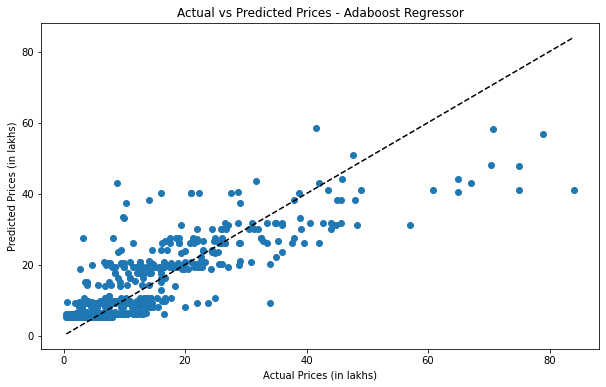

In [992]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_adaboost)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')
plt.title("Actual vs Predicted Prices - Adaboost Regressor")
plt.xlabel("Actual Prices (in lakhs)")
plt.ylabel("Predicted Prices (in lakhs)")
plt.show()

# Gradient Boosting Regressor - Best Performing Algorithm

In [993]:
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

### Cross Validation - Gradient Boosting

In [994]:
gradient_boosting_cv_scores = cross_val_score(gradient_boosting_pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores for GradientBoosting Regressor: {gradient_boosting_cv_scores}")
print(f"Mean CV R2 Score for GradientBoosting Regressor: {gradient_boosting_cv_scores.mean()}")

Cross-validation R2 scores for GradientBoosting Regressor: [0.84913312 0.86135394 0.85907717 0.87582002 0.82122524]
Mean CV R2 Score for GradientBoosting Regressor: 0.8533218967531884


### Fitting and Evaluation - Gradient Boosting

In [995]:
gradient_boosting_pipeline.fit(X_train, y_train)

gradient_boosting_y_pred = gradient_boosting_pipeline.predict(X_test)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_y_pred)
print(f"R2 Score for GradientBoosting Regressor: {gradient_boosting_r2}")

R2 Score for GradientBoosting Regressor: 0.8837759660317674


### Hyper Parameter Tuning

In [1004]:
# Defining the parameter grid to search
param_grid = {
    'regressor__n_estimators': [500, 600, 700],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [4,5,6]
}

grid_search = GridSearchCV(gradient_boosting_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

best_gradient_boosting_model = grid_search.best_estimator_

y_pred_best_model = best_gradient_boosting_model.predict(X_test)
r2_best_model = r2_score(y_test, y_pred_best_model)
print(f"Validation R2 Score for the Best GradientBoosting Regressor: {r2_best_model}")


Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 700}
Best R2 Score: 0.8795503856129508
Validation R2 Score for the Best GradientBoosting Regressor: 0.9121905688406888


### Actual vs Predicted - Gradient Boosting 

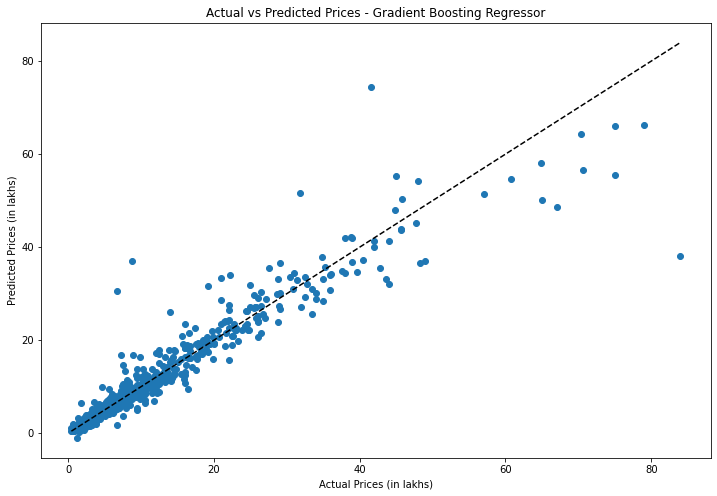

In [997]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_best_model)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')
plt.title("Actual vs Predicted Prices - Gradient Boosting Regressor")
plt.xlabel("Actual Prices (in lakhs)")
plt.ylabel("Predicted Prices (in lakhs)")
plt.show()

### Saving Test Data Predictions in Text File

In [998]:
# Loading the test data
test_data = pd.read_csv("test_data.csv")

# Clean the 'Mileage', 'Engine', and 'Power' columns in test data
test_data['Mileage'] = test_data['Mileage'].apply(extract_numerical_from_string)
test_data['Engine'] = test_data['Engine'].apply(extract_numerical_from_string)
test_data['Power'] = test_data['Power'].apply(extract_numerical_from_string)

# Make predictions on the test set
test_predictions = pipeline.predict(test_data)

# Save predictions to a text file
with open("predicted_prices.txt", "w") as file:
    for prediction in test_predictions:
        file.write(f"{prediction:.2f}\n")

print("Predictions saved to predicted_prices.txt")

Predictions saved to predicted_prices.txt


# K Nearest Neighbour Regressor

In [999]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())])

### Cross Validation 

In [1000]:
knn_cv_scores = cross_val_score(knn_pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores for KNN: {knn_cv_scores}")
print(f"Mean CV R2 Score for KNN: {knn_cv_scores.mean()}")

Cross-validation R2 scores for KNN: [0.8312893  0.80958353 0.8498302  0.85969441 0.79317954]
Mean CV R2 Score for KNN: 0.8287153953053616


### Model Fitting and Evaluation

In [1001]:
knn_pipeline.fit(X_train, y_train)

knn_y_pred = knn_pipeline.predict(X_test)
knn_r2 = r2_score(y_test, knn_y_pred)
print(f"R2 Score for KNN: {knn_r2}")

R2 Score for KNN: 0.8265435116209041


### Hyper Parameter Tuning - KNN

In [1002]:
param_grid = {
    'regressor__n_neighbors': [2, 3, 4, 5, 6, 7, 8,9, 10]
}

# Initiased the GridSearchCV object for KNN
knn_grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='r2')

# Fitting the GridSearchCV object on the training data
knn_grid_search.fit(X_train, y_train)

# best parameters found by GridSearchCV
print("Best Parameters for KNN:", knn_grid_search.best_params_)

# Getting the best KNN model from GridSearchCV
best_knn_model = knn_grid_search.best_estimator_

# Evaluating the best KNN model on the validation set
best_knn_y_pred = best_knn_model.predict(X_test)
best_knn_r2 = r2_score(y_test, best_knn_y_pred)
print(f"Validation R2 Score for Best KNN Model: {best_knn_r2}")

Best Parameters for KNN: {'regressor__n_neighbors': 6}
Validation R2 Score for Best KNN Model: 0.8184552421339526


### Actual vs Predicted - K Nearest Regressor

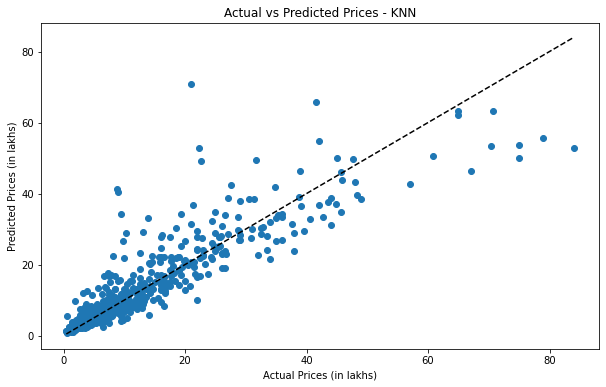

In [1003]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_knn_y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')
plt.title("Actual vs Predicted Prices - KNN")
plt.xlabel("Actual Prices (in lakhs)")
plt.ylabel("Predicted Prices (in lakhs)")
plt.show()